In [59]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#2 Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X_orig = dataset.iloc[:,1:2].values.astype(float)
y_orig = dataset.iloc[:,2:3].values.astype(float)
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_orig)
y = sc_y.fit_transform(y_orig)

In [33]:
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. 
#We have a non-linear condition so we can select polynomial or gaussian but here we select 
#RBF(a gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

C:\Users\vzhyvov\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [34]:
#5 Predicting a new result
sc_y.inverse_transform ((regressor.predict (sc_X.transform(np.array([[6.5]])))))

array([170370.0204065])

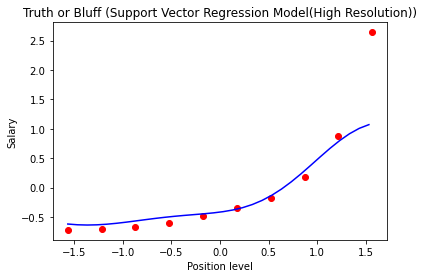

In [36]:
#6 Visualising the Regression results (for higher resolution and #smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Support Vector Regression Model(High Resolution))')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()